<a href="https://colab.research.google.com/github/sdgroeve/D012513A-Specialised-Bio-informatics-Machine-Learning/blob/main/scikit-learn-example/example_scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

#### Breast cancer wisconsin (diagnostic) dataset

Number of Instances: 569

Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:

        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    
Class Distribution: 212 - Malignant, 357 - Benign

Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

Donor: Nick Street

Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

# Loading data

In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/D012513A-Specialised-Bio-informatics-Machine-Learning/main/scikit-learn-example/breast_cancer_dataset.csv")
#data = pd.read_csv("breast_cancer_dataset.csv")

data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# The features

In [2]:
X = data.iloc[:,:-1]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [4]:
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

In [5]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,-1.256562e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
mean texture,569.0,1.049736e-16,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
mean perimeter,569.0,-1.272171e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
mean area,569.0,-1.900452e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
mean smoothness,569.0,-8.226187e-16,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
mean compactness,569.0,2.419467e-16,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
mean concavity,569.0,-1.315097e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
mean concave points,569.0,-8.780323e-17,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
mean symmetry,569.0,1.957036e-16,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
mean fractal dimension,569.0,5.073075e-16,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


# The label

In [6]:
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

# Train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating the model

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Model fitting

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

# Computing predictions

In [10]:
predictions = model.predict(X_test)

predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0], dtype=int64)

# Evaluate the predictions

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

cm

array([[37,  1],
       [ 1, 75]], dtype=int64)

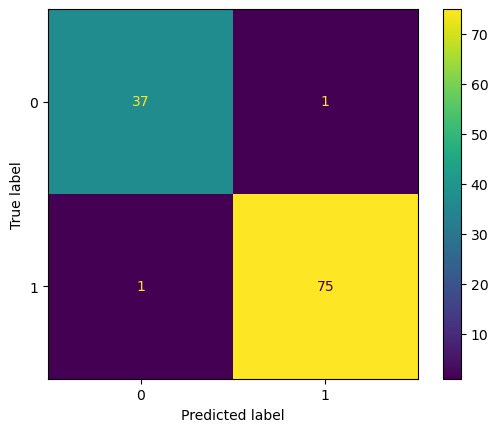

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_).plot()

# Feature extraction: t-SNE

In [23]:
from sklearn.manifold import TSNE

prj_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10)

X_embedded = prj_tsne.fit_transform(X)

In [24]:
X_embedded

array([[-19.29329   , -56.113686  ],
       [ -0.06108114, -44.72349   ],
       [-15.307834  , -52.80717   ],
       ...,
       [ 11.886931  , -28.540382  ],
       [-21.432274  , -52.713516  ],
       [ 23.52647   ,  37.12104   ]], dtype=float32)

In [25]:
tsne_result = pd.DataFrame(X_embedded, columns=["t-SNE_1","t-SNE_2"])
tsne_result["label"] = y
tsne_result

,t-SNE_1,t-SNE_2,label
0,-19.293289,-56.113686,0
1,-0.061081,-44.723492,0
2,-15.307834,-52.807171,0
3,-35.559608,-33.017845,0
4,10.750038,-50.984821,0
...,...,...,...
564,-9.292411,-61.930691,0
565,3.780147,-52.136585,0
566,11.886931,-28.540382,0
567,-21.432274,-52.713516,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="label",data=tsne_result)

# K-means clustering of feature vectors

## k = 2 clusters

In [28]:
from sklearn.cluster import KMeans

cls_kmns = KMeans(n_clusters=2, init='k-means++')

In [31]:
kmeans_result = cls_kmns.fit_predict(X)

kmeans_result

C:\Users\svend\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [32]:
tsne_result["kmeans_full"] = kmeans_result

tsne_result

,t-SNE_1,t-SNE_2,label,kmeans_full
0,-19.293289,-56.113686,0,1
1,-0.061081,-44.723492,0,1
2,-15.307834,-52.807171,0,1
3,-35.559608,-33.017845,0,1
4,10.750038,-50.984821,0,1
...,...,...,...,...
564,-9.292411,-61.930691,0,1
565,3.780147,-52.136585,0,1
566,11.886931,-28.540382,0,1
567,-21.432274,-52.713516,0,1


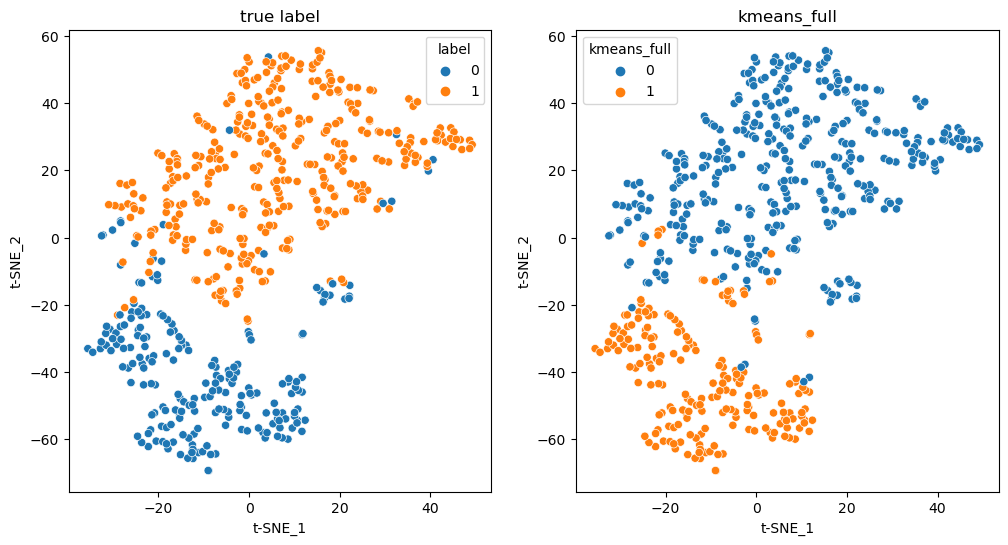

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="label",data=tsne_result,ax=axes[0])
axes[0].set_title("true label")
axes[1] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="kmeans_full",data=tsne_result,ax=axes[1])
axes[1].set_title("kmeans_full")
plt.show()

## k = 3 clusters

C:\Users\svend\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


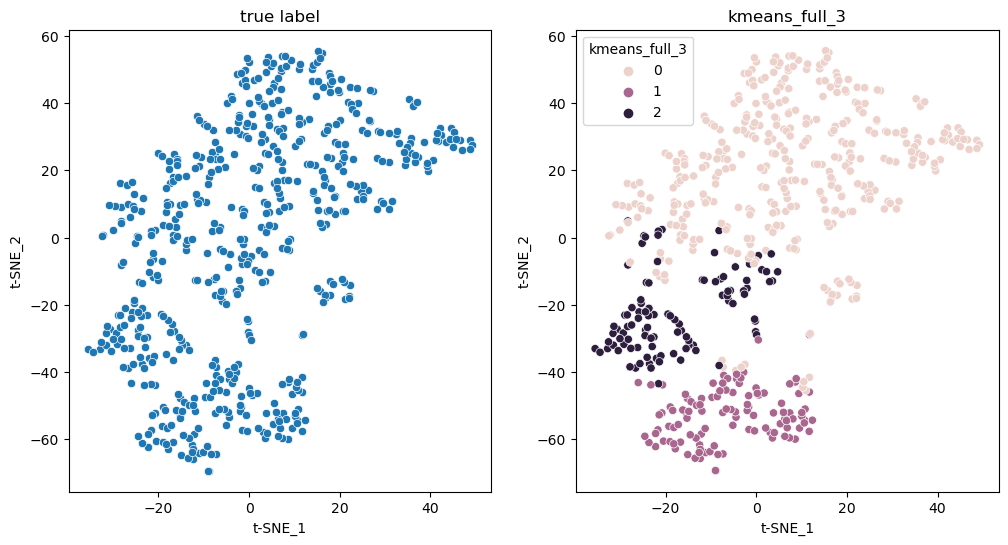

In [51]:
cls_kmns = KMeans(n_clusters=3, init='k-means++')

kmeans_result = cls_kmns.fit_predict(X)

tsne_result["kmeans_full_3"] = kmeans_result

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",data=tsne_result,ax=axes[0])
axes[0].set_title("true label")
axes[1] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="kmeans_full_3",data=tsne_result,ax=axes[1])
axes[1].set_title("kmeans_full_3")
plt.show()

# K-means clustering of embedding

## k = 2 clusters

In [43]:
cls_kmns = KMeans(n_clusters=2, init='k-means++')

kmeans_result = cls_kmns.fit_predict(X_embedded)

C:\Users\svend\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [44]:
tsne_result["kmeans_embedded"] = kmeans_result

tsne_result

,t-SNE_1,t-SNE_2,label,kmeans_full,kmeans_embedded
0,-19.293289,-56.113686,0,1,1
1,-0.061081,-44.723492,0,1,1
2,-15.307834,-52.807171,0,1,1
3,-35.559608,-33.017845,0,1,1
4,10.750038,-50.984821,0,1,1
...,...,...,...,...,...
564,-9.292411,-61.930691,0,1,1
565,3.780147,-52.136585,0,1,1
566,11.886931,-28.540382,0,1,1
567,-21.432274,-52.713516,0,1,1


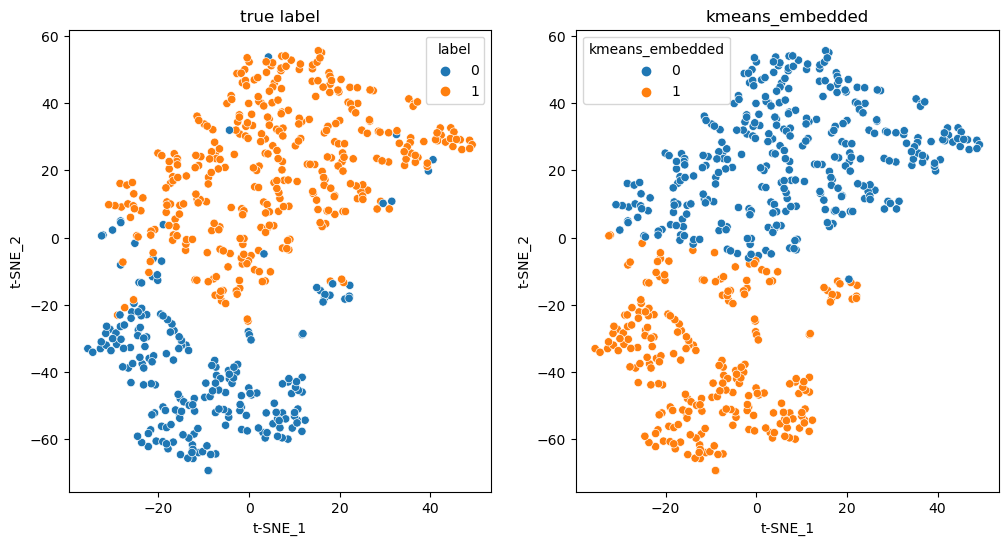

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="label",data=tsne_result,ax=axes[0])
axes[0].set_title("true label")
axes[1] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="kmeans_embedded",data=tsne_result,ax=axes[1])
axes[1].set_title("kmeans_embedded")
plt.show()

## k = 3 clusters

C:\Users\svend\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


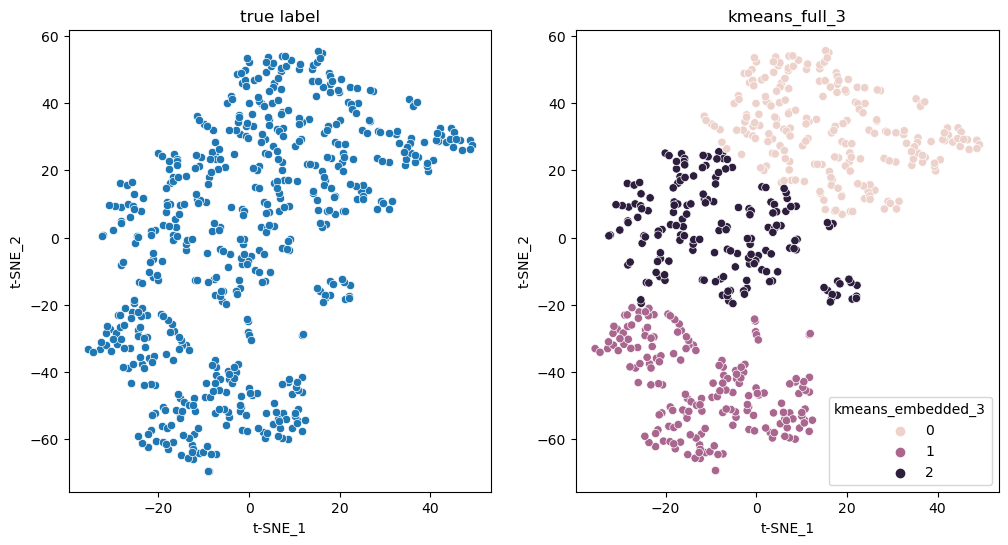

In [50]:
cls_kmns = KMeans(n_clusters=3, init='k-means++')

kmeans_result = cls_kmns.fit_predict(X_embedded)

tsne_result["kmeans_embedded_3"] = kmeans_result

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",data=tsne_result,ax=axes[0])
axes[0].set_title("true label")
axes[1] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="kmeans_embedded_3",data=tsne_result,ax=axes[1])
axes[1].set_title("kmeans_full_3")
plt.show()